In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive/AI/Classification_Model/archive"
!ls

Mounted at /content/gdrive
/content
/content/gdrive/MyDrive/AI/Classification_Model/archive
 base_model.h5		'EfficientNetB0-100-(224 X 224)- 98.40.h5'   sports.csv
 best_version.h5	 f1.jpg					     test
 best_version.keras	 golf.jpg				     train
 best_version_v3.h5	 images_prediction			     updated_model.h5
 best_version_v3.keras	 improved_model.keras			     valid
 bowling-300x225.jpg	 sports_100.h5


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import utils,layers,Sequential
import os
import cv2
import seaborn as sns

import matplotlib.pyplot as plt
import math
import random


from tensorflow.python.keras import models, layers, optimizers, utils

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout, BatchNormalization
from tensorflow.keras import callbacks
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

In [3]:
base = "/content/gdrive/MyDrive/AI/Classification_Model/archive"

In [4]:
train_dir = os.path.join(base,'train')
test_dir = os.path.join(base, 'test')
valid_dir = os.path.join(base, 'valid')

train = keras.preprocessing.image_dataset_from_directory(train_dir, image_size=(224, 224), seed=42, batch_size=32)
validation = keras.preprocessing.image_dataset_from_directory(valid_dir, image_size=(224, 224), seed=42, batch_size=16)
test = keras.preprocessing.image_dataset_from_directory(test_dir, image_size=(224, 224), seed=42, batch_size=16)

Found 13635 files belonging to 100 classes.
Found 510 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


# Examining 8 random pictures

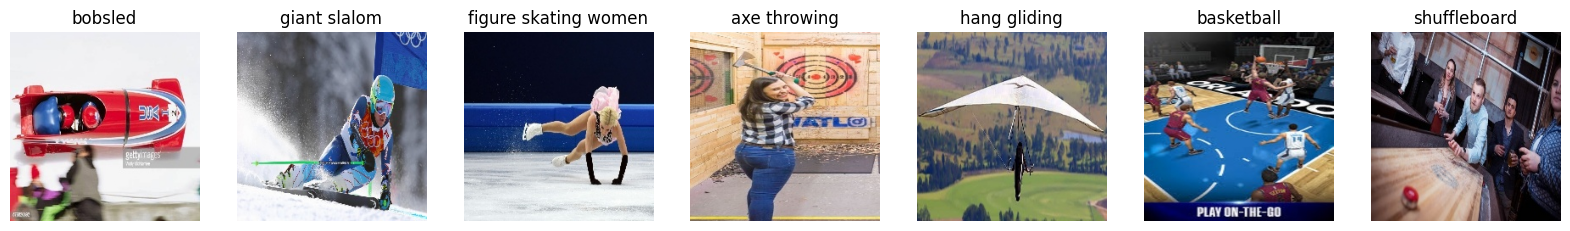

In [5]:
# Select 8 different image files
image_files = []
sport_names = []
number_images = 7
for i in range(number_images):
    sport_dir = random.choice(os.listdir(train_dir))
    sport_path = os.path.join(train_dir, sport_dir)
    image_file = random.choice(os.listdir(sport_path))
    image_path = os.path.join(sport_path, image_file)
    image_files.append(image_path)
    sport_names.append(sport_dir)

# Load and display the images horizontally
fig, axs = plt.subplots(1, number_images, figsize=(20, 3))
for i in range(number_images):
    # Load the image from the file
    image_path = image_files[i]
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))

    # Convert the image to a numpy array
    image_array = tf.keras.preprocessing.image.img_to_array(image)

    # Rescale the pixel values between 0 and 1
    image_array /= 255.

    # Get the sport name from the list
    sport_name = sport_names[i]

    # Display the image with the sport name as the title
    axs[i].imshow(image_array)
    axs[i].set_title(sport_name)
    axs[i].axis('off')

plt.show()

In [6]:
input_shape = (224,224,3)

In [7]:
img_size = 224
batch_size= 20

train_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)


test_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size= (img_size, img_size),
                                                    batch_size = batch_size,
                                                    shuffle = True,
                                                    class_mode ='categorical')

val_generator = val_datagen.flow_from_directory(valid_dir,
                                                target_size= (img_size, img_size),
                                                batch_size = batch_size,
                                                shuffle = False,
                                                class_mode ='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                target_size= (img_size, img_size),
                                                batch_size = batch_size,
                                                shuffle = False,
                                                class_mode ='categorical')

Found 13635 images belonging to 100 classes.
Found 510 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [8]:
resnet_weights_path = 'imagenet'

In [9]:
model = Sequential()

model.add(ResNet50(include_top = False, pooling = 'avg',
                  weights = resnet_weights_path))

94765736/94765736 [==============================] - 1s 0us/step


In [10]:
model.add(Dense(100, activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 100)               204900    
                                                                 
Total params: 23792612 (90.76 MB)
Trainable params: 23739492 (90.56 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [12]:
model.layers
model.layers[0].trainable = False

In [13]:
model.compile(optimizer= 'sgd',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [14]:
history = model.fit(train_generator,
                    validation_data = val_generator, epochs = 8)

Epoch 1/8
682/682 [==============================] - 3685s 5s/step - loss: 1.6082 - accuracy: 0.6373 - val_loss: 0.5785 - val_accuracy: 0.8882
Epoch 2/8
682/682 [==============================] - 2651s 4s/step - loss: 0.5171 - accuracy: 0.8810 - val_loss: 0.3774 - val_accuracy: 0.9216
Epoch 3/8
682/682 [==============================] - 2635s 4s/step - loss: 0.3527 - accuracy: 0.9236 - val_loss: 0.3110 - val_accuracy: 0.9235
Epoch 4/8
682/682 [==============================] - 2664s 4s/step - loss: 0.2728 - accuracy: 0.9435 - val_loss: 0.2538 - val_accuracy: 0.9314
Epoch 5/8
682/682 [==============================] - 2632s 4s/step - loss: 0.2203 - accuracy: 0.9591 - val_loss: 0.2295 - val_accuracy: 0.9412
Epoch 6/8
682/682 [==============================] - 2593s 4s/step - loss: 0.1853 - accuracy: 0.9683 - val_loss: 0.2180 - val_accuracy: 0.9451
Epoch 7/8
682/682 [==============================] - 2575s 4s/step - loss: 0.1592 - accuracy: 0.9757 - val_loss: 0.2050 - val_accuracy: 0.9490

In [15]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,1.608227,0.637330,0.578488,0.888235
1,0.517087,0.881041,0.377397,0.921569
2,0.352655,0.923579,0.311043,0.923529
3,0.272753,0.943528,0.253801,0.931373
4,0.220339,0.959076,0.229495,0.941176
5,0.185255,0.968317,0.217988,0.945098
6,0.159216,0.975651,0.204969,0.949020
7,0.138583,0.982398,0.194016,0.950980


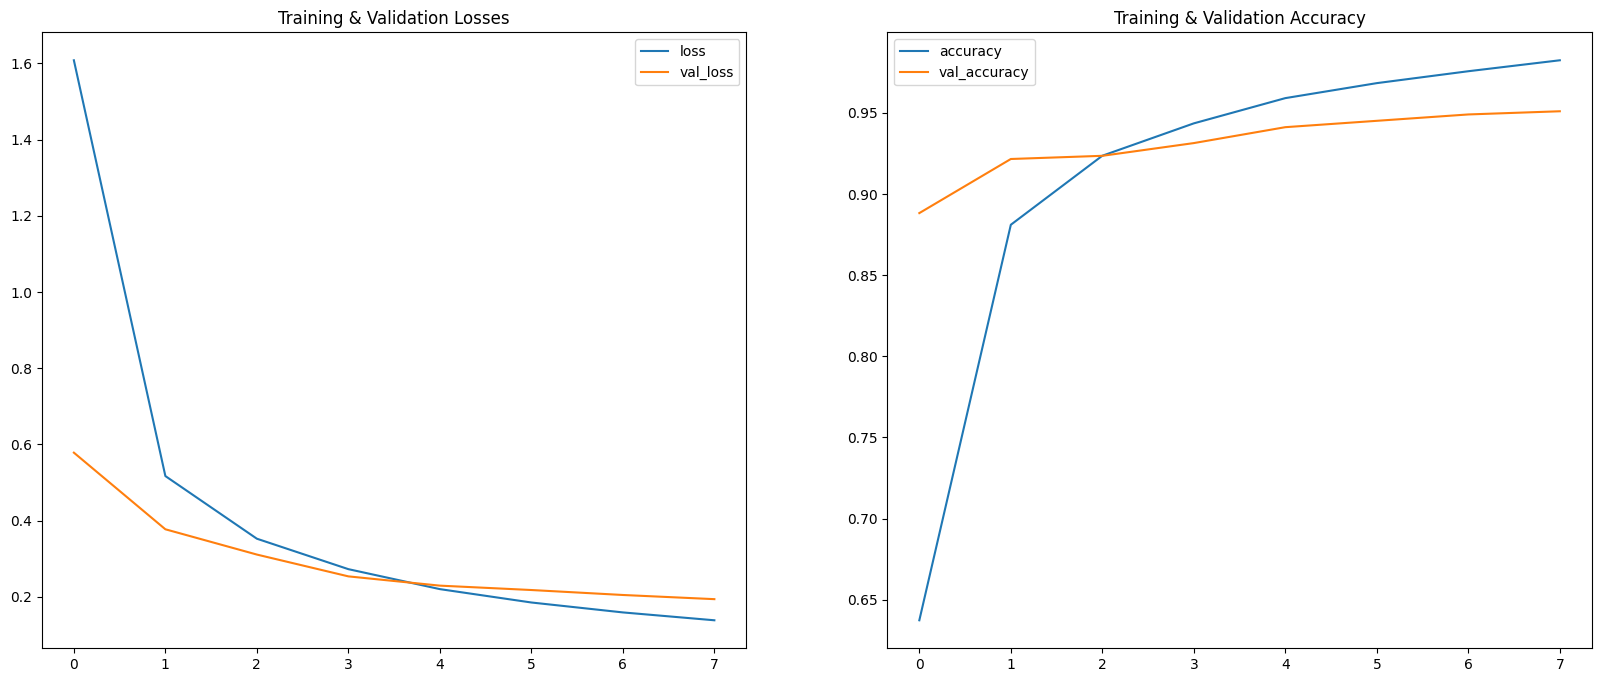

In [16]:
train_func = ['loss', 'accuracy']
valid_func = ['val_loss', 'val_accuracy']
titles = [
    'Training & Validation Losses',
    'Training & Validation Accuracy'
]

def plotting_training_result(histories, title, i=1):
    plt.subplot(1, 2, i)
    for hist in histories:
        plt.plot(range(history_df.shape[0]), history_df[hist], label=hist)
    plt.title(title, fontsize=12)
    plt.legend()

for i in range(len(train_func)):
    plotting_training_result([train_func[i], valid_func[i]], title=titles[i], i=i+1)

Saving the model

In [27]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [30]:
model.save('/content/drive/MyDrive/MyFolder/improved_transfer.h5', save_format="h5")

In [29]:
model.save('/content/drive/MyDrive/improved_transfer', save_format="h5")

In [17]:
tester = model.evaluate(test_generator)

print("Loss of the model is - " , tester[0])
print("Accuracy of the model is - " , tester[1]*100 , "%")

25/25 [==============================] - 145s 6s/step - loss: 0.1823 - accuracy: 0.9500
Loss of the model is -  0.18232670426368713
Accuracy of the model is -  94.9999988079071 %


Making Predictions with model

1/1 [==============================] - 0s 188ms/step


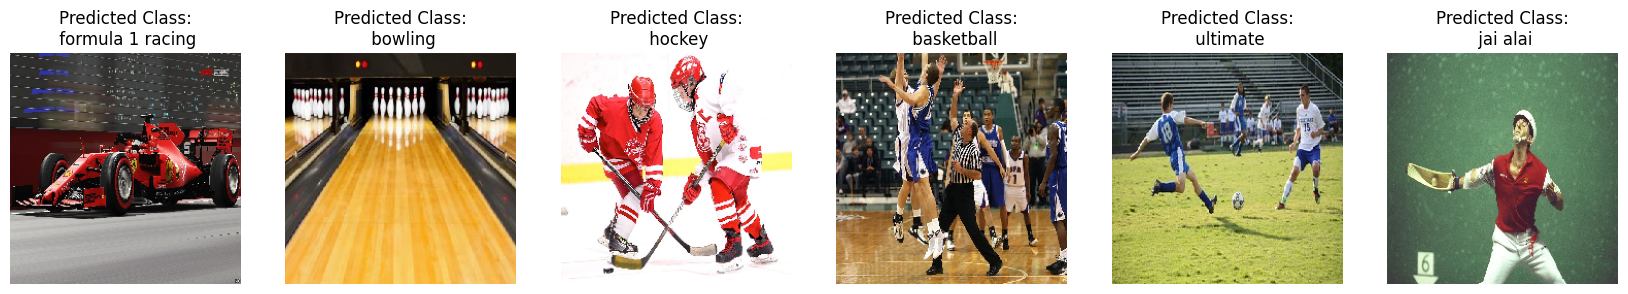

In [18]:
import os

# Define the path to the folder containing the images
folder_path = '/content/gdrive/MyDrive/AI/Classification_Model/archive/images_prediction/'

# Get a list of all the files in the folder
image_files = os.listdir(folder_path)
horizontal_size = len(image_files)*3.5
class_names = train.class_names

# Create a single row of subplots
fig, axs = plt.subplots(1, len(image_files), figsize=(horizontal_size, 3))

# Loop over the image files
for i, image_file in enumerate(image_files):
    # Construct the path to the image file
    image_path = os.path.join(folder_path, image_file)

    # Load the image
    img = tf.keras.utils.load_img(image_path, target_size=(224, 224))

    # Preprocess the image
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = keras.applications.vgg16.preprocess_input(x)

    # Make a prediction
    preds = model.predict(x)
    class_idx = np.argmax(preds[0])
    class_name = class_names[class_idx]

    # Plot the image with the predicted label in a separate subplot
    axs[i].imshow(img)
    axs[i].set_title(f'Predicted Class:\n {class_name}')
    axs[i].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1)

# Show the plot
plt.show()